<a href="https://colab.research.google.com/github/eubrunoosouza/airbnb-exploratory-analysis/blob/main/PROJETO_AIRBNB_EDIMBURGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Análise Exploratória de Dados**
*by [Bruno C. Souza](https://guarani.tech)*

---

# **Análise dos Dados do Airbnb (Edimburgo/Escócia).**

O [Airbnb](https://www.airbnb.com.br/) é uma das **maiores empresas do ramo de hotelaria da atualidade**. O principal detalhe é que ela, seguindo a mesma linha de outras gigantes da tecnologia, **não possui nenhum hotel**!

O seu principal foco é de conectar pessoas que querem viajar, e obviamente se hospedar, com anfitriões locais que desejam alugar os seus imóveis de maneira prática, sem tantas burocracias. O Airbnb fornece uma plataforma inovadora para realizar toda essa troca entre os *'hosts'* e hóspedes.


Mais ou menos ao final do ano de 2018, a Startup fundada há cerca de 10 anos, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes tradicionais de hotelaria.


Uma iniciativa muito legal do Airbnb é a disponibilização dos dados reais de algumas das principais cidades do mundo, provenientes de sua plataforma. Isto é possível por meio do **portal:** [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde se é possível fazer o **download direto** de uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*. 

*Este projeto só foi possível graças a esta iniciativa! Thanks!*


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---

## **Por que Edimburgo e não outra cidade?**

A escolha desta cidade em particular, dentre tantas outras disponibilizadas pelo [portal do Airbnb](http://insideairbnb.com/get-the-data.html/), foi motivada pelo simples fato de estar realizando, no momento de elaboração deste projeto, um curso de **teoria musical** à distância, pela **University of Edinburgh**. Decidir unir o útil ao agradável, pois além de ***Engenheiro*** e ***Cientista de dados Júnior***, também sou ***músico***, e isso ***há mais de 10 anos***. 

Amo música clássica, por conta da dificuldade mesmo, e em meu tempo livre estudo piano. Percebo que isto aguça minha mente e melhora meu *foco, concentração e coordenação motora*.<br><br>

<img alt="Colaboratory logo" width="80%" src="https://github.com/eubrunoosouza/airbnb-exploratory-analysis/blob/main/EDIMBURGO%20(1).png?raw=true">


## **Como os dados foram obtidos?**


Todos os dados que serão utilizados neste projeto de análise expolatória foram obtidos pelo site: [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

*Para esta análise inicial, será baixado apenas o seguinte arquivo:*

`listings.csv` - Summary information and metrics for listings in Santiago (good for visualisations).<br><br>


> **IMPORTANTE:** O portal está em constante atualização, e em determinado momento, pode ser que o conjunto de dados exato utilizado neste notebook não esteja mais disponível, o que quebraria nosso código.


Pensando nisso, disponibilizei aqui o conjunto de dados que foram utilizados, para que você sempre consiga utilizar esse material.<br><br>


Com isso tudo em mente, vamos iniciar esta **análise exporatória**!


In [ ]:
# importando a biblioteca geoespacial "folium"

!pip install folium

In [ ]:
# importar os pacotes necessarios

import folium
import pandas as pd
from folium import plugins
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('https://www.dropbox.com/s/uw7kzs25e0wn7iu/listings.csv?dl=1')

## Análise dos Dados Brutos

Esta etapa inicial tem por objetivo explorar o *dataset* e extrair informações iniciais, a fim de termos noção situacional dos dados brutos. A forma como estão distribuidos, quantidade de itens etc.<br><br>

Antes, gostaria de apresentar um **sumário básico** das variáveis presentes nesta base de dados:<br><br>


**DICIONÁRIO DE VARIÁVEIS:**

* `id` - número de id gerado para identificação do imóvel.
* `name` - descrição do nome do imóvel anunciado na plataforma do AirBnB.
* `host_id` - número de id do proprietário(anfitrião) do imóvel.
* `host_name` - nome do anfitrião do imóvel.
* `neighbourhood_group` - esta coluna não contém nenhum valor válido.
* `neighbourhood` - nome do bairro/vizinhaça da localidade.
* `number_of_reviews` - número total de avaliações.
* `number_of_reviews_ltm` - número de avaliações (últimos 12 meses).
* `latitude` - coordenada da latitude da propriedade.
* `license` - licença, número de registro.
* `longitude` - coordenada de longitude da propriedade.
* `room_type`	- informação sobre o tipo de quarto oferecido.
* `price` - preço de aluguel do imóvel.
* `minimum_nights` - quantidade de noites minímas de acomodação.
* `last_review`	- data da última avaliação do imóvel.
* `reviews_per_month` - número de reviews por mês.
* `calculated_host_listings_count` - quantidades de propriedades de um mesmo anfitrião.
* `availability_365` - números de dias de disponibilidade para aluguel do imóvel dentro de 365 dias.<br><br>

Antes de tudo, é bem importante verificarmos a 'cara' do nosso *dataset*, **analisando as 5 primeiras entradas**.<br><br>

Vamos lá!

In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,360,2020-08-28,5.31,1,269,22,NaN
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,2019-09-08,1.97,1,0,11,NaN
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,45,4,57,2018-08-27,0.93,2,303,1,NaN
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,205,2021-08-15,1.67,2,12,6,NaN
4,54188,The Four Sisters Boatel,253850,Natalie,NaN,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,179,1,36,2017-01-01,0.56,2,272,5,NaN


### **Quantos atributos (variáveis) e entradas o dataset possui? E os tipos?**

Bom, vamos ver então quantas **entradas**(*leia-se linhas*) o nosso _dataset_ possui, e também vamos verificar as **colunas** presentes.

Vale ressaltar que este dataset que estamos utilizando é uma versão **"resumida"** do *Airbnb*. No mesmo portal do *Airbnb*, onde baixamos o arquivo `listings.csv`, há também uma versão mais completa a: `listings.csv.gz`. Uma versão mais robusta e com mais variáveis.

In [ ]:
# identificar o volume de dados do DataFrame

print("O dataset possui:\t {} entradas".format(df.shape[0]))
print("O dataset possui:\t {} variáveis\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

O dataset possui:	 6146 entradas
O dataset possui:	 18 variáveis



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

É preciso se fazer uma análise preliminiar, após a importação do dataset, a fim de mapear os dados ausentes ou nulos. Com isso em mãos, temos uma noção melhor da qualidade do _dataset_. 

**_Abaixo vamos observar as porcentagens dos dados nulos, por coluna, em relação ao total de entradas._**



*   É possível ver que as colunas `neighbourhood_group` e `license`possuem **100%** dos seus valores ausentes, nulos.
*   Logo em seguida temos que as variáveis `last_review` e `reviews_per_month` possuem pouco mais do que **10%** de seus valores nulos.
*   A variável `host_name` possui uma quantidade muito pequena de dados ausentes.





In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.111292
last_review                       0.111292
host_name                         0.000325
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Conclusões preliminares:**

*   É possível ver que as colunas `neighbourhood_group` e `license` possuem **100%** dos seus valores ausentes.
*   Logo em seguida temos que as variáveis `last_review` e `reviews_per_month` possuem pouco mais do que **10%** de seus valores nulos.
*   A variável `host_name` possui uma quantidade muito pequena de dados ausentes.


### **Como as variáveis numéricas estão distribuidas?** 

Para ter uma visualização inicial da forma como as variáveis numéricas se distribuem, irei plotar um *histograma* das variáveis numéricas.

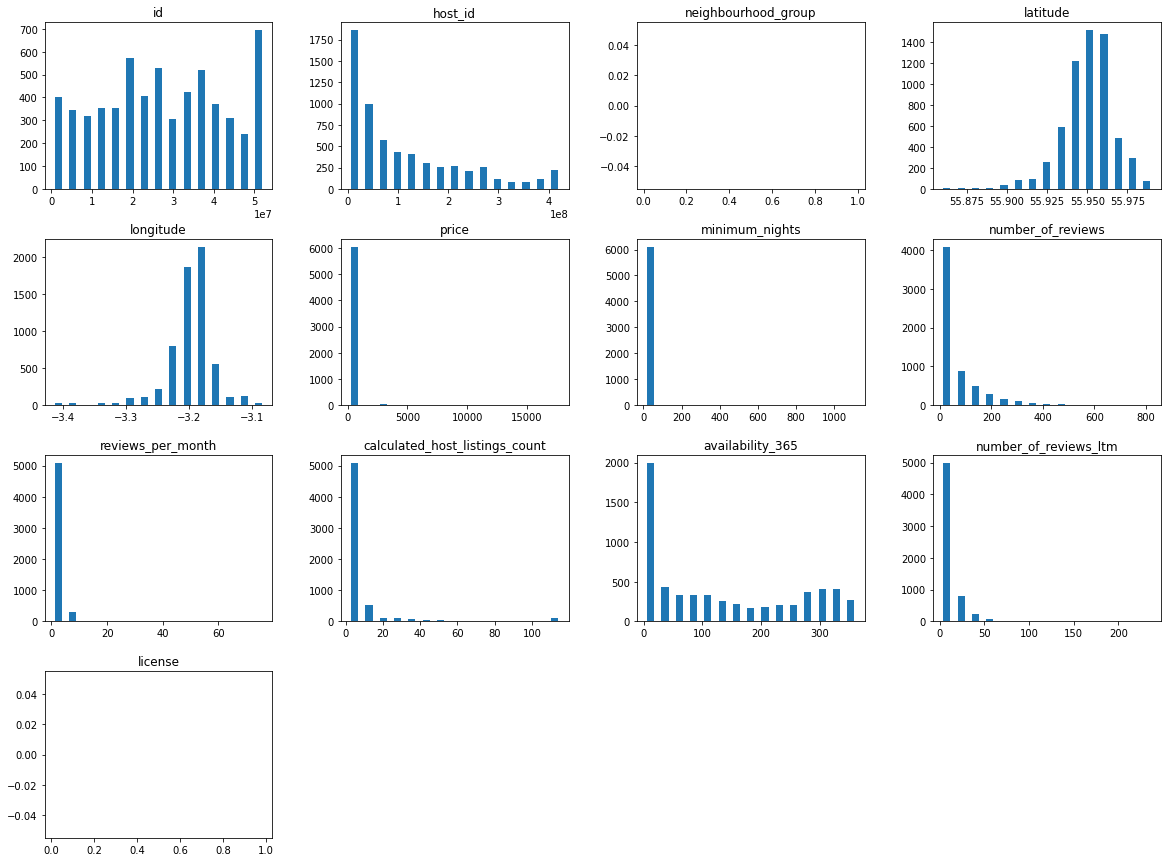

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, grid=False, figsize=(20,15), zorder=2, rwidth=0.5);

### **Conclusões preliminares após plotagem do histograma:**

*   A coluna `minimum_nights` e `price`, que representam respectivamente o **número mínimo de noites** e o **preço de aluguel**, ambas possuem uma distribuição bem atípica, iremos verificar isto melhor a seguir.


## **Verificação de valores muito discrepantes, os chamados '*OUTLIERS*'.**

Verificar os outliers é uma etapa de extrema importância, pois eles podem **comprometer** e **enviesar** a nossa análise exploratória, fazendo com que cheguemos à conclusões equivocadas sobre os dados.

In [ ]:
# verificação de outliers

df[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6146.000000,6146.000000,6146.000000,5462.000000,6146.00000,6146.000000
mean,184.488773,4.364302,61.985519,2.013213,7.03547,131.059551
std,729.983800,30.909509,92.770313,2.892681,17.34203,125.357151
min,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,58.000000,1.000000,4.000000,0.450000,1.00000,2.000000
50%,89.000000,2.000000,23.000000,1.300000,1.00000,94.000000
75%,135.000000,3.000000,82.000000,2.757500,5.00000,258.000000
max,17921.000000,1124.000000,831.000000,77.000000,116.00000,365.000000


### **Conclusões preliminares:**
Olhando o resumo estatístico acima, podemos confirmar a existência de outliers e podemos levantar algumas hipóteses como:

*   A variável `price` possui **75%** do valor abaixo de **135**, porém o seu valor máximo é de **17921**.
*   A quantidade mínima de noites (`minimum_nights`) está acima de **365 dias** no ano. Mais precisamente **1124 noites**.<br><br>

Para tratar os **outliers** presentes no _dataset_, os seguintes passos serão adotados:

1.   _Definir o **Q1** e **Q3** para as variáveis que serão limpas._
2.   _Calcular o **IQR** para as variáveis._
3.   _Definir o limite **superior** e **inferior** para cortar os outliers._
4.   _Remover os **outliers**._


## Identificando os outliers e plotagem de boxplot para `price`.

Iniciaremos com uma verificação os limites para `price` e, com um gráfico do tipo boxplot, iremos analisar visualmente os *outliers* presentes na distribuição da variável.


In [ ]:
# identificando outliers para os preços(price).

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR da variável price é {} '.format(IQR_price))

# definindo os limites para price.

superior_limit_price = q3_price + 1.5 * IQR_price
inferior_limit_price = q1_price - 1.5 * IQR_price

print('O limite superior para price é: {}'.format(superior_limit_price))
print('O limite inferior para price é: {}'.format(inferior_limit_price))

IQR da variável price é 77.0 
O limite superior para price é: 250.5
O limite inferior para price é: -57.5


O dataset em questão possui 6146 entradas no total.
481 entradas estão acima do limite superior de 250.5 para a variavel 'price'.
Isto corresponde a 7.83% das entradas da coluna em relação ao total.



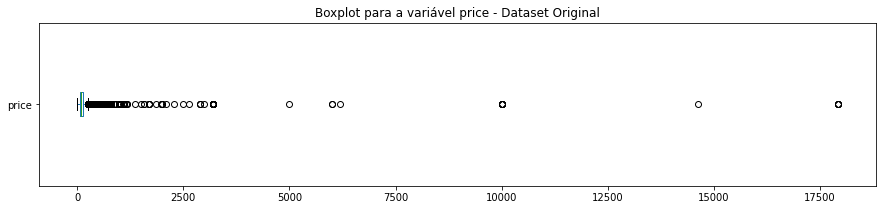

In [ ]:
# plotagem de gráfico do tipo boxplot para 'price'.

fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Boxplot para a variável price - Dataset Original')

# ver a quantidade de valores acima do limite superior para price

print("O dataset em questão possui {} entradas no total.".format(df.shape[0]))

print("{} entradas estão acima do limite superior de {} para a variavel 'price'."
      .format(len(df[df.price > superior_limit_price]),superior_limit_price))

print("Isto corresponde a {:.2f}% das entradas da coluna em relação ao total.\n"
      .format((len(df[df.price > superior_limit_price]) / df.shape[0])*100))

## Identificando os outliers e plotagem de boxplot para `minimum_nights`.

Assim como foi feito para a variável `price`, também iremos verificar os limites para `minimum_nights`, e com um gráfico do tipo boxplot, iremos analisar visualmente os outliers presentes na distribuição da variável em questão.



In [ ]:
# identificando outliers para minimum_nights.

q1_min_nights = df.minimum_nights.quantile(.25)
q3_min_nights = df.minimum_nights.quantile(.75)
IQR_min_nights = q3_min_nights - q1_min_nights

print('IQR da variável minimum_nights é {} '.format(IQR_min_nights))

# definindo os limites para minimum_nights.    

sup_limit_min_nights = q3_min_nights + 1.5 * IQR_min_nights
inf_limit_min_nights = q1_min_nights - 1.5 * IQR_min_nights

print('O limite superior para price é: {}'.format(sup_limit_min_nights))
print('O limite inferior para price é: {}'.format(inf_limit_min_nights))

IQR da variável minimum_nights é 2.0 
O limite superior para price é: 6.0
O limite inferior para price é: -2.0


O dataset possui 6146 entradas no total
310 entradas estão acima do limite superior de 6.0
Isto corresponde a 5.04% do nosso dataset.



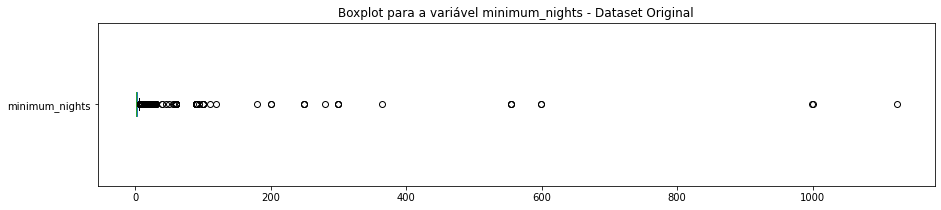

In [ ]:
# plotagem de gráfico do tipo boxplot para 'minimum_nights'.

fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Boxplot para a variável minimum_nights - Dataset Original')

# ver a quantidade de valores acima do limite superior para minimum_nights.

print("O dataset possui {} entradas no total".format(df.shape[0]))
print("{} entradas estão acima do limite superior de {}".format(len(df[df.minimum_nights 
      > sup_limit_min_nights]),sup_limit_min_nights))
print("Isto corresponde a {:.2f}% do nosso dataset.\n".format((len(df[df.minimum_nights 
      > sup_limit_min_nights]) / df.shape[0])*100))


## **Limpeza dos Dados**

É importante pontuar que as colunas com **baixo poder preditivo** e **grande quantidade de dados faltantes** podem ser excluídas. 

Este é o caso das variáveis: `neighbourhood_group`, `license`, `reviews_per_month` e `last_review`.

***Vamos prosseguir com a limpeza destes dados.***


In [ ]:
# eliminando colunas com dados nulos não relevantes

df_clean = df.copy()
df_clean.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# removendo os outliers

df_clean.drop(df_clean[df_clean.minimum_nights > sup_limit_min_nights].index, 
              axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.price > superior_limit_price].index, 
              axis=0, inplace=True)


# verificação de dados nulos após limpeza inicial

display(df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0])


reviews_per_month                 0.091568
last_review                       0.091568
host_name                         0.000371
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64



> Optei por remover os valores nulos em `reviews_per_month, last_review e host_name`, pois estes dados são irrelevantes para esta minha análise exploratória.



In [ ]:
# limpando os dados nulos faltantes

df_clean.dropna(axis=0, inplace=True)

# verificação final da limpeza do dataset

display(df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0])

number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

In [ ]:
# verificando o tamanho da redução do dataset após a limpeza

reducao_de_entradas = ((df.shape[0] - df_clean.shape[0]) / df.shape[0])*100
reducao_de_variaveis = ((df.shape[1] - df_clean.shape[1]) / df.shape[1])*100

print('Antes da limpeza tínhamos: {} entradas e {} variáveis.'
      .format(df.shape[0], df.shape[1]))

print('Após a limpeza ficamos com: {} entradas e {} variáveis.\n'
      .format(df_clean.shape[0], df_clean.shape[1]))

print('Houve uma redução percentual de {:.2f}% nas entradas.'
      .format(reducao_de_entradas))

print('Houve uma redução percentual de {:.2f}% nas variáveis.'
      .format(reducao_de_variaveis))

Antes da limpeza tínhamos: 6146 entradas e 18 variáveis.
Após a limpeza ficamos com: 4890 entradas e 16 variáveis.

Houve uma redução percentual de 20.44% nas entradas.
Houve uma redução percentual de 11.11% nas variáveis.


## **Resumo do que foi feito nesta limpeza**

1. Removemos as colunas `license` e `neighbourhood_group`, pelo fato delas não serem relevantes para a análise exploratória e também por estarem com **100%** dos valores ausentes.

2. Foram removidos os outliers presentes em `minimum_nights` e `price`.
3. Remoção dos valores nulos em `reviews_per_month, last_review e host_name`, pois estes dados são irrelevantes.


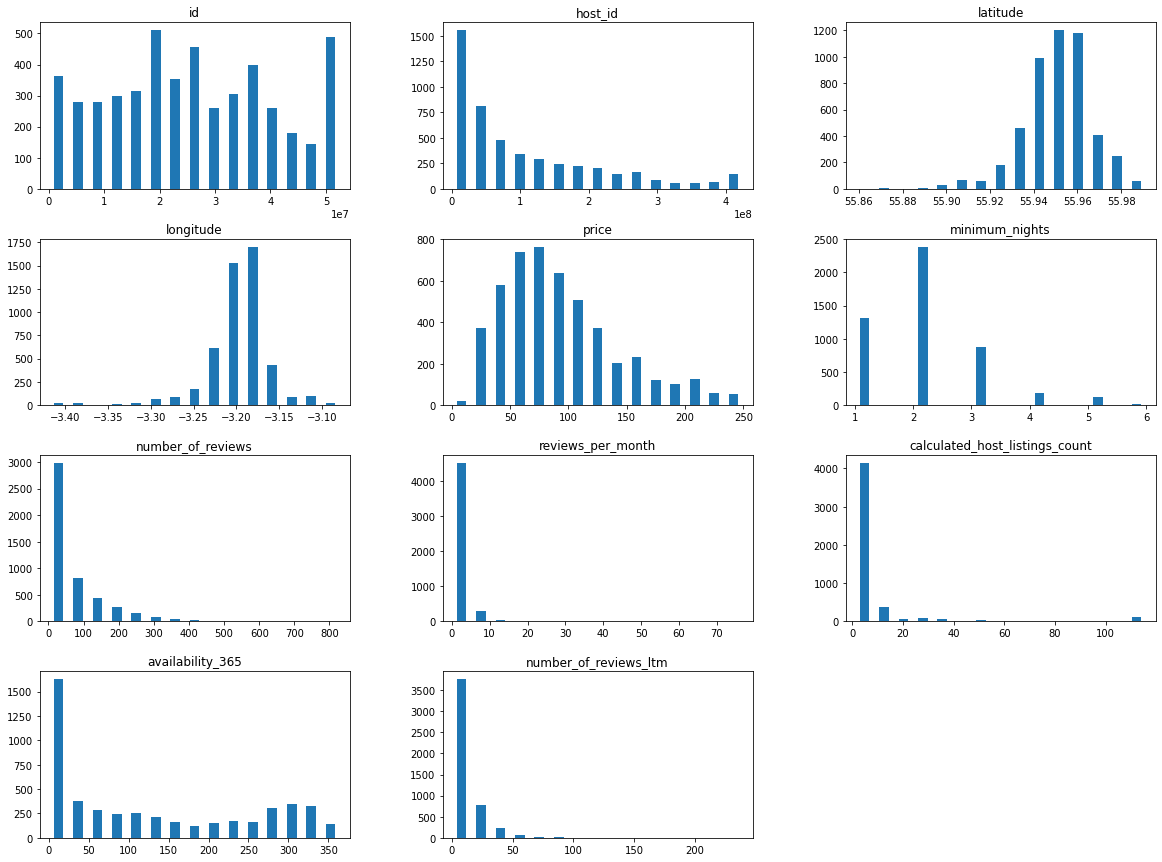

In [ ]:
# plotando  o histograma das variáveis numéricas após a limpeza

df_clean.hist(bins=15, grid=False, figsize=(20,15), zorder=2, rwidth=0.5);

## **Plotagem de boxplots após a limpeza e remoção de outliers**

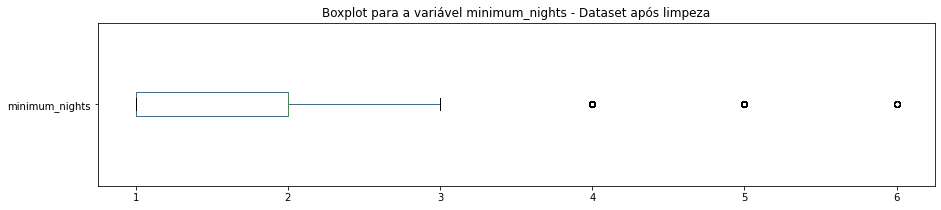

In [ ]:
# plotagem de gráfico do tipo boxplot para 'minimum_nights'.

fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Boxplot para a variável minimum_nights - Dataset após limpeza');

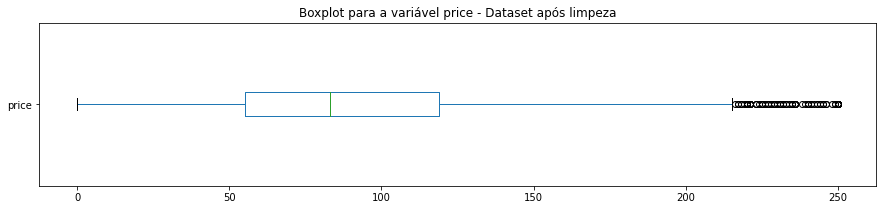

In [ ]:
# plotagem de gráfico do tipo boxplot para 'price'.

fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Boxplot para a variável price - Dataset após limpeza');

### **Qual seria média dos preços de aluguel em Edimburgo?**

Após todo este processo de limpeza, podemos verificar a média de preços em libras na cidade.

In [ ]:
# ver a média da coluna `price`

media_de_precos = df_clean.price.mean()

print("A média de preços dos aluguéis é de £{:.2f}".format(media_de_precos))


A média de preços dos aluguéis é de £91.92


### **Qual a correlação que existe entre as variáveis?**

Agora iremos verificar a correlação das variáveis presentes no dataset.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.128330,-0.081695,-0.023945,0.155458,0.161741
minimum_nights,0.128330,1.000000,-0.034379,-0.100546,-0.061249,-0.125296
number_of_reviews,-0.081695,-0.034379,1.000000,0.401886,-0.082557,0.076587
reviews_per_month,-0.023945,-0.100546,0.401886,1.000000,0.003656,0.045600
calculated_host_listings_count,0.155458,-0.061249,-0.082557,0.003656,1.000000,0.142033
availability_365,0.161741,-0.125296,0.076587,0.045600,0.142033,1.000000


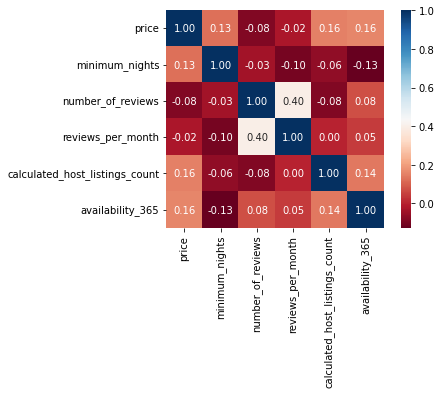

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);




> As variáveis em geral possuem **correlação baixa**, porém há uma correlação significativa, já esperada, entre `number_of_reviews` e `reviews_per_months`.


### **Qual a categoria de imóvel que é mais alugado, pelo Airbnb, em Edimburgo?**

Podemos verificar isto facilmente. Veja o código abaixo:

In [ ]:
# qual tipo de imóvel é o mais alugado?

df_clean.room_type.value_counts()

Entire home/apt    3399
Private room       1431
Hotel room           53
Shared room           7
Name: room_type, dtype: int64

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

most_frequent_rent = df_clean.room_type.value_counts()

print("O tipo de imóvel mais alguado é o 'Entire home/apt' com {}"
      .format(most_frequent_rent[0]))

O tipo de imóvel mais alguado é o 'Entire home/apt' com 3399


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.673283
Private room       0.307029
Hotel room         0.015457
Shared room        0.004230
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**

Conheço pouco sobre os bairros da cidade de Edimburgo, então irei me ater somente aos resultados da análise.



In [ ]:
# ver média de preços por bairros na cidade

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Carrick Knowe                                128.800000
New Town West                                125.695402
New Town East and Gayfield                   113.939394
Old Town, Princes Street and Leith Street    111.319422
Fairmilehead                                 111.000000
Deans Village                                109.785992
Western Harbour and Leith Docks              107.962963
Canongate, Southside and Dumbiedykes         103.924855
Canonmills and New Town North                103.676056
Meadows and Southside                        103.024096
Name: price, dtype: float64



> **Os bairros com maior média de preços da cidade seriam:**
1.  *Carrick Knowe*
2.  *New Town West*


In [ ]:
# Verificar a quantidade de imóveis dos 2 primeiros bairros

print(df_clean[df_clean.neighbourhood == 'Carrick Knowe'].shape)
print(df_clean[df_clean.neighbourhood == 'New Town West'].shape)

(5, 16)
(174, 16)


## **Distribuição por Latitute e Longitude em função dos Preços**

> O gráfico de dispersão abaixo, plotado em função das latitudes e longitudes, nos mostra uma distribuição bem razoável de preços ao longo da extensão territorial da cidade. Com um acúmulo maior de imóveis, e também preços mais altos ao centro do mapa, região próxima ao ***castelo de Edimburgo***.


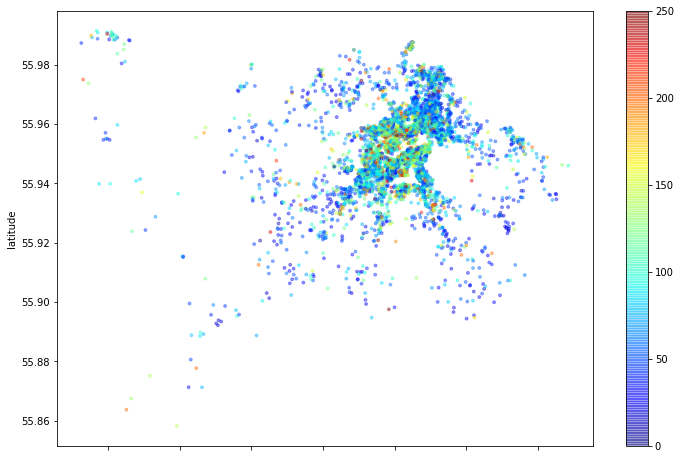

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
# utilizando o folium para um mapa interativo

edinburgh_map = folium.Map(location=[55.9494, -3.16028], zoom_start= 10)

coordinates= []
for x, y in zip(df_clean.latitude, df_clean.longitude):
    coordinates.append([x,y])
    
edinburgh_map.add_child(plugins.MarkerCluster(coordinates))

edinburgh_map

# para visualização do mapa gerado, abra este notebook no google colab.

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

media_noites_minimas = df_clean.minimum_nights.mean()

print("A média do mínimo de noites para alguel é de cerca {:.2f} noites".format(media_noites_minimas))

A média do mínimo de noites para alguel é de cerca 2.07 noites


## **Conclusões e Insights**

Em suma, podemos dizer que:

* Em relação ao *dataset original*, após a limpeza, reduzimos um percentual de **20.44% nas entradas**.

* Em relação ao *dataset original*, após a limpeza, reduzimos um percentual de **11.11% nas variáveis**.

* A *média de preços* dos aluguéis na cidade gira em torno de **£91.92**.

* Os *bairros* com maior média de preços da cidade seriam: **Carrick Knowe** e **New Town West**. Destaque para esta último bairro, pois ele fica próximo a pontos turísticos da cidade.

* A média do *mínimo de noites* na cidade é cerca de **2 noites**.<br><br>

Por fim, acredito que esta análise exploratória obteve resultados razoáveis e em concordância com a realidade da cidade, em termos turísticos.

Numa próxima análise irei utilizar o dataset mais completo disponibilizado pelo Airbnb.<br><br>

_**Agradeço pelo seu tempo!**_ 🙂



---

